# Likelihood

This notebook is about the concept of likelihood. Likelihood is a measure by which different statistical models can be compared. Especially parameters in a statistical model can be estimated by the "maximum likelihood" method.

## Example 1: Sum of dices

Let's play a game: Person A gets 5 classical dices (with numbers 1 to 6). He/she can choose to roll $n=1\dots 5$ of these dices and will tell us the sum. The same number of dices is rolled again, and we get a second sum.

In [1]:
sums_of_n_dices = c(10,12)

Can we find out how many dices Person A took?

### The statistical model

Our statistical model says that these numbers are the results of a random experiment. The number of dices $n$ is a model parameter.

For a fixed $n$, we get probabilities for the possilbe sums of eyes. For $n=1$, we obviously get:

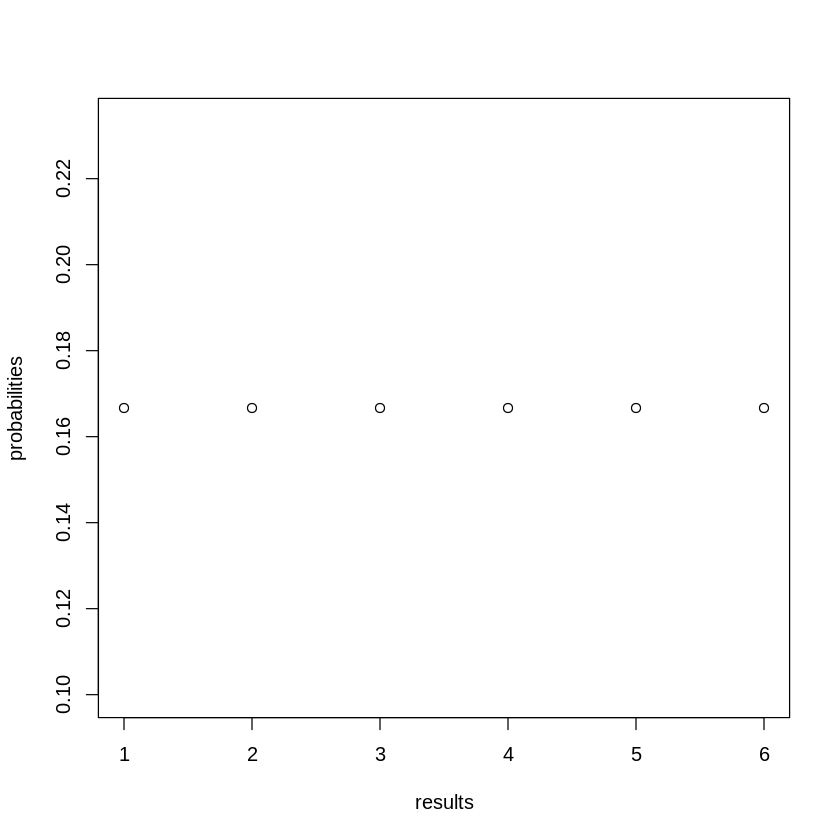

In [2]:
results = 1:6
probabilities = rep(1/6,6)
plot(results, probabilities)

For $n=2$, the whole thing gets more complicated. Let us calculate all possible combinations:

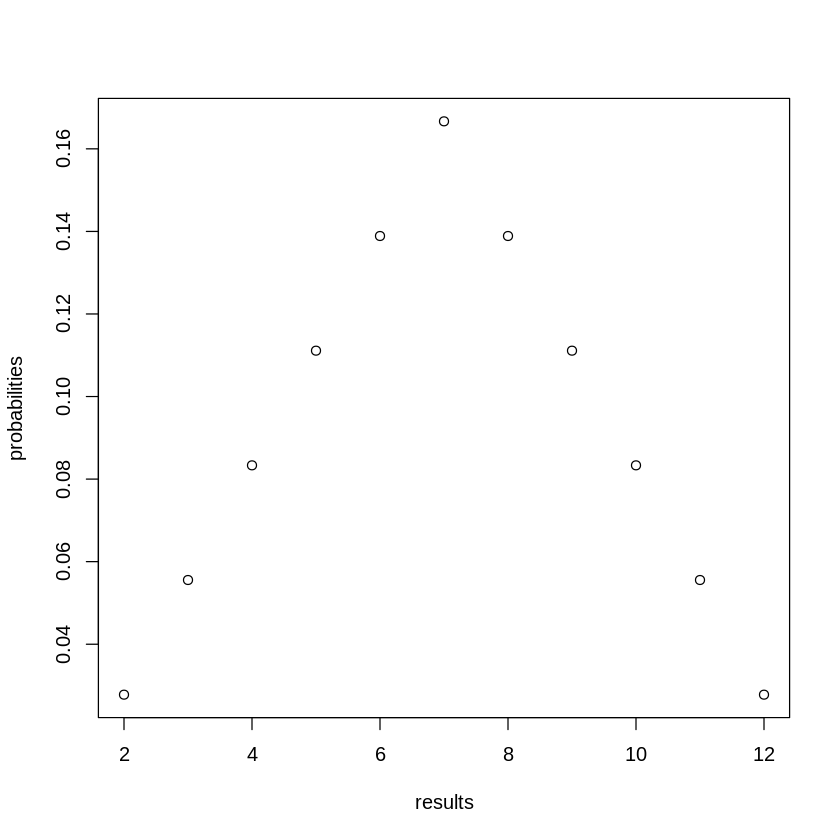

In [3]:
n=2
results = (n*1):(n*6)     # possible results go from 2 to 12

# first calculate the number of possibilities to get a certain sum
possibilities = results*0
for (dice1 in 1:6) {
    for (dice2 in 1:6) {
        sum=dice1+dice2
        possibilities[results==sum]=possibilities[results==sum]+1
    }
}

# then calculate probability by dividing through the total number of combinations
probabilities = possibilities / sum(possibilities)

# do the plot
plot(results,probabilities)

If $n=2$, what is the probability that exactly our observed numbers were the result?

In [8]:
match(c("c","d"),c("a","b","c","d"))

[1] 3 4

In [5]:
# find out the indexes in the probability vector
indexes = match(sums_of_n_dices,results) 
print("indexes in probability vector:")
print(indexes)

[1] "indexes in probability vector:"
[1]  9 11


In [6]:
# find out the individual probabilities for the single sums
ind_probs = probabilities[indexes]
print("probabilities of individual sums:")
print(ind_probs)

[1] "probabilities of individual sums:"
[1] 0.08333333 0.02777778


In [7]:
# find out the overall probability:
overall_prob = prod(ind_probs)
print("overall probability:")
print(overall_prob)

[1] "overall probability:"
[1] 0.002314815


If we see this value as a function of the model parameter $n$, we call it __likelihood__ of the statistical model.
    
### <span style="color:blue">Definition of Likelihood</span>
<span style="color:blue">The likelihood of a statistical model is the probability (density) for the actually observed result, seen as a function of a model parameter.</span>

### Calculating likelihood

So, what's the likelihood for $n=3\dots 5$? Let us write a recursive function to estimate the probabilities:
</span>

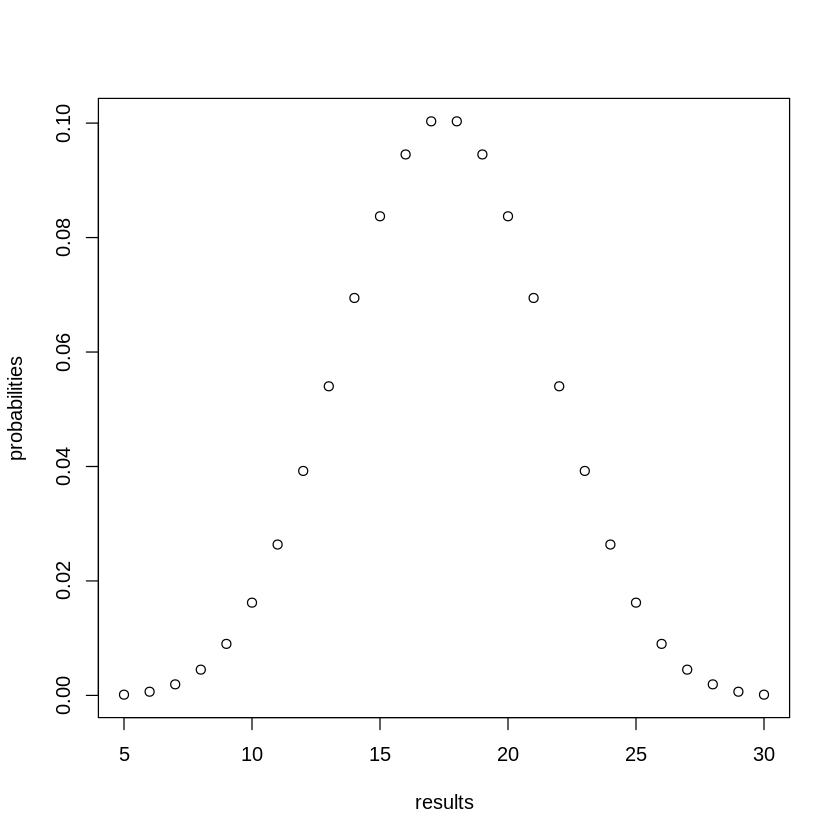

In [9]:
calc_probability = function(n) {
    if (n==1) {
        # one dice only - return a very simple data.frame
        df = data.frame(results=1:6, probabilities=rep(1/6,6))
        return(df)
    } else {
        # first, get the probabilities for sums of n-1 dices
        old_probabilities = calc_probability(n-1)$probabilities
        # the new results are easy to calculate
        new_results = (n*1):(n*6)
        l = length(new_results)
        # initialise new probabilities with zero
        new_probabilities = new_results*0
        # the new probabilities emerge from the old ones depending on the value of the current dice
        new_probabilities[1:(l-5)] = new_probabilities[1:(l-5)] + 1/6 * old_probabilities # 1/6 chance that new dice == 1
        new_probabilities[2:(l-4)] = new_probabilities[2:(l-4)] + 1/6 * old_probabilities # 1/6 chance that new dice == 2
        new_probabilities[3:(l-3)] = new_probabilities[3:(l-3)] + 1/6 * old_probabilities # 1/6 chance that new dice == 3
        new_probabilities[4:(l-2)] = new_probabilities[4:(l-2)] + 1/6 * old_probabilities # 1/6 chance that new dice == 4
        new_probabilities[5:(l-1)] = new_probabilities[5:(l-1)] + 1/6 * old_probabilities # 1/6 chance that new dice == 5
        new_probabilities[6:l    ] = new_probabilities[6:l    ] + 1/6 * old_probabilities # 1/6 chance that new dice == 6
        df = data.frame(results=new_results, probabilities=new_probabilities)
        return(df)
    } 
}
plot(calc_probability(5))

Now we can estimate the likelihood of a given $n$ in two steps:
* Calculate the probability distribution for $n$
* Estimate the probability that exactly the observed result occurs

Let's write this down as a function:

In [10]:
likelihood = function(n) {
    # calculate probability density
    df = calc_probability(n)
    
    # check if all individual sums are possible 
    if (all(sums_of_n_dices %in% df$results)) {
        indexes = match(sums_of_n_dices,df$results) 
        ind_probs = df$probabilities[indexes]
        overall_prob = prod(ind_probs)
        return(overall_prob)
    } else { # there was a sum which is not possible with n dices
        return(0)
    }
}

Now we run this function:

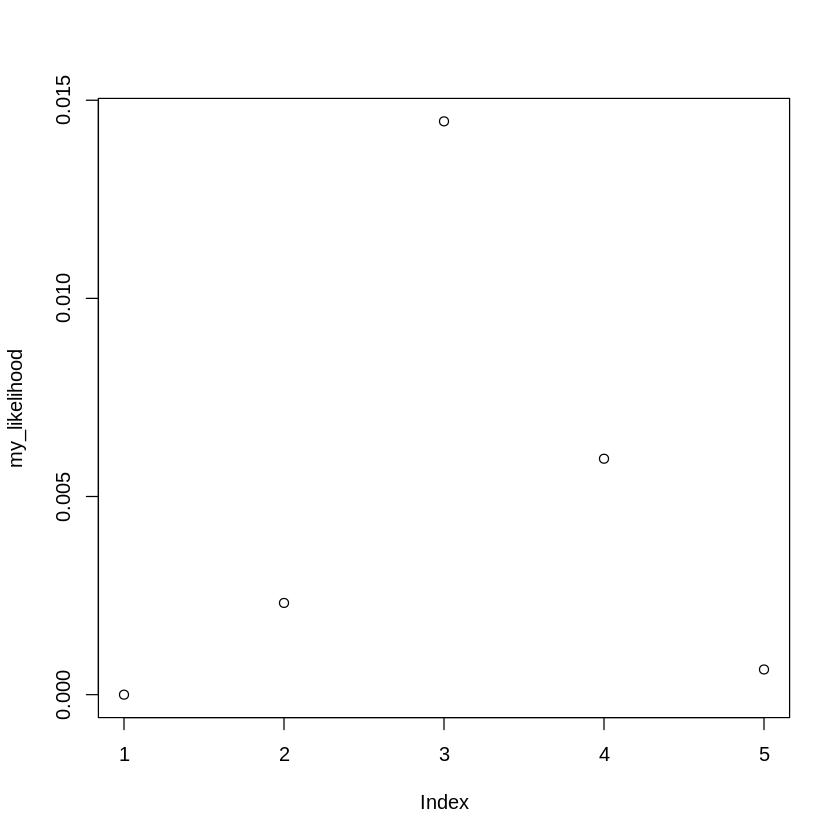

In [11]:
my_likelihood = rep(NA,5)

for (n in 1:5) {
    my_likelihood[n]=likelihood(n)
}
plot(my_likelihood)

Please note one important difference between probability and likelihood:

__Likelihood is not normalised to a sum of one.__

Likelihood should only be interpreted relatively. 

### Maximum-likelihood estimation

That's easy: The maximum-likelihood estimator chooses the parameter value with the highest likelihood.

In [12]:
ml_estimate = which(my_likelihood == max(my_likelihood))
print(paste0("Maximum likelihood estimate: n = ",ml_estimate))

[1] "Maximum likelihood estimate: n = 3"


But we can also use this to estimate uncertainty intervals by a likelihood ratio test. E.g. we exclude all those parameters whose likelihood is below 5% of the maximum likelihood:

In [13]:
possible = which(my_likelihood >= 0.05*max(my_likelihood))
print(paste0("Possible n value after likelihood ratio test: n = ",possible))

[1] "Possible n value after likelihood ratio test: n = 2"
[2] "Possible n value after likelihood ratio test: n = 3"
[3] "Possible n value after likelihood ratio test: n = 4"


In [16]:
possible_likelihoods = my_likelihood[possible]
df = data.frame(n=possible,p=possible_likelihoods)
df = df[rev(order(df$p)),]
print(df)

  n           p
2 3 0.014467593
3 4 0.005953742
1 2 0.002314815


__Please note that this does not mean that $n$ is in this interval with 95% probability!__

### Playground area
Here you can check whether the ML estimator works. 
You can choose more than two results, or more than five dices.

[1] "Maximum likelihood estimate: n = 2"
[1] "Possible n value after likelihood ratio test: n = 2"
[2] "Possible n value after likelihood ratio test: n = 3"


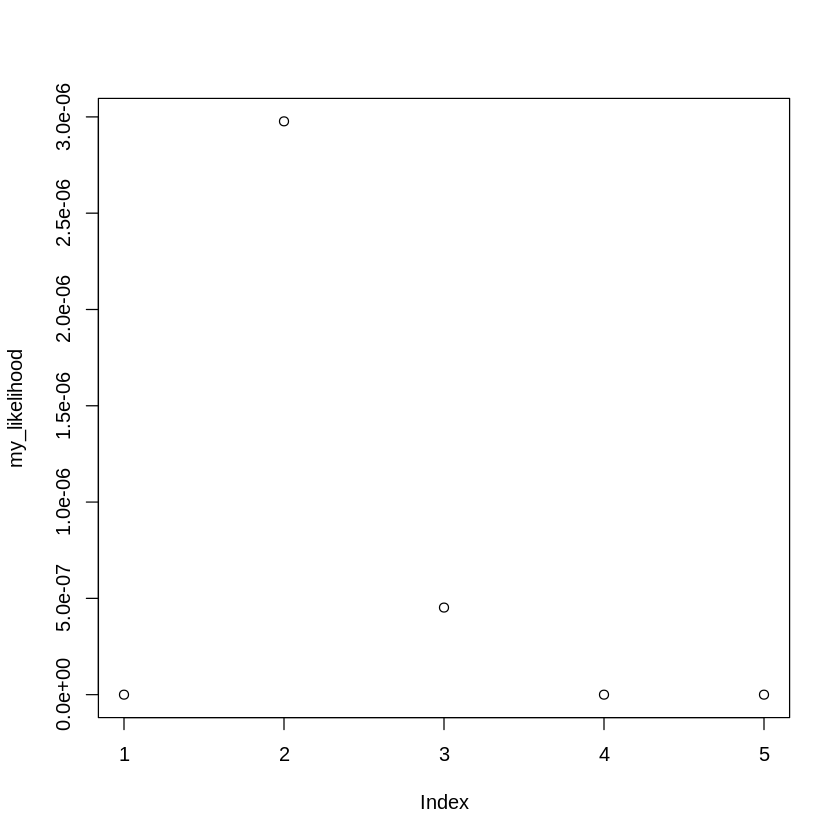

In [17]:
sums_of_n_dices = c(12,10,8,7,3)
my_likelihood = rep(NA,5)

for (n in seq_along(my_likelihood)) {
    my_likelihood[n]=likelihood(n)
}

ml_estimate = which(my_likelihood == max(my_likelihood))
print(paste0("Maximum likelihood estimate: n = ",ml_estimate))
possible = which(my_likelihood >= 0.05*max(my_likelihood))
print(paste0("Possible n value after likelihood ratio test: n = ",possible))
plot(my_likelihood)

## Continuously valued results

Often the results are not discrete as in our dice example, but continuous. 

__Example:__ Person B shall add $n$ real numbers in the interval $[0\dots 1]$. This is done twice with the same $n$, the results are 3.753421 and 5.295758. Which $n$ was chosen?

We see that the probability that exactly these numbers are the result is always zero. So we use a probability density, instead of a probability, to calculate the likelihood.

__Hint:__ This means the likelihood is not dimensionless. If, e.g., the observations are in meters,

3.05 m, 4.07 m, 2.76 m

the unit of the likelihood is 1/m³, because it is approximately calculated as follows:

$$l = \frac{p(3.045\,\textrm{m} < y1 < 3.055\,\textrm{m})}{0.01\,\textrm{m}}\frac{p(4.065\,\textrm{m} < y2 < 4.075\,\textrm{m})}{0.01\,\textrm{m}}\frac{p(2.755\,\textrm{m} < y3 < 2.765\,\textrm{m})}{0.01\,\textrm{m}}$$

## Estimating systematic and random parameters

Mostly one needs to estimate at least two types of parameters, the systematic and the random parameters. Example: a linea r model

$$\hat{y_n} = \beta_0 + \beta_1 x_n + \varepsilon_n$$

with Gaussian residuals $\epsilon_n$ with $E(\varepsilon_n^2)=\sigma^2$.

Here, we need to estimate three parameters, $\beta_0$, $\beta_1$ and $\sigma$.

A maximum-likelihood estimator typically underestimates the true value of $\sigma$ here, which is why a Restricted Maximum Likelihood (REML) estimator should be used. It estimates the systematic parameters ($\beta_0$ and $\beta_1$)first, and afterwards does an ML estimation of $\sigma$ based on the residuals $\varepsilon_n$ only, taking the loss of the degrees of freedom (by the $\beta_0, \beta_1$ estimation) into account. This gives unbiased results for $\sigma$.

## Bayesian approach

Now person B is doing our dice-rolling experiment. This is different because we already know that their favourite number is three. 

So even before the experiment ("a priori"), we have an idea how many dices they might choose:

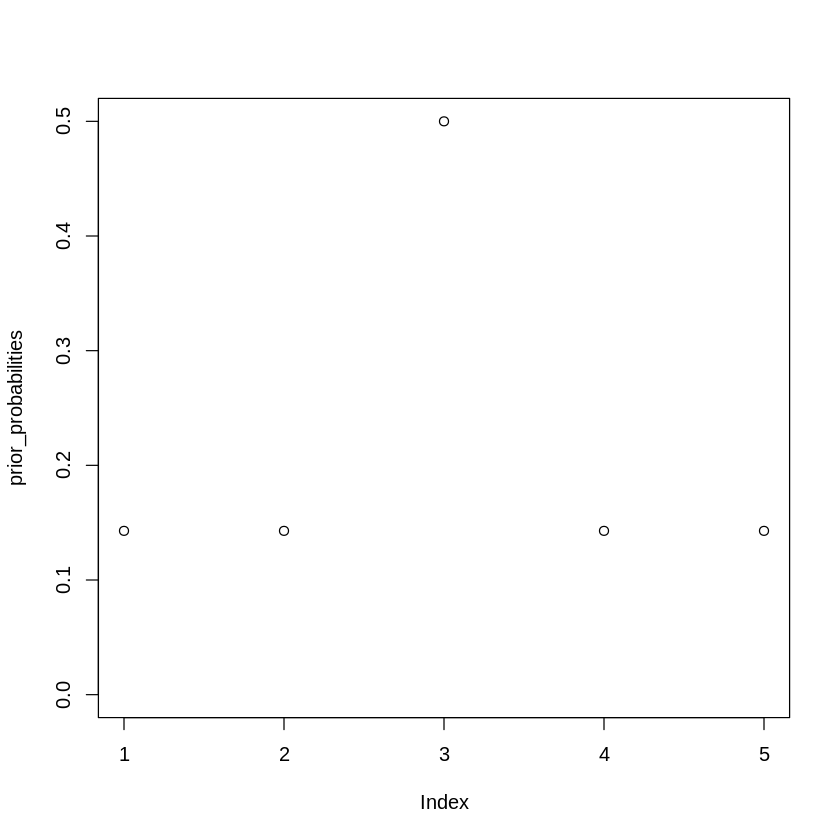

In [22]:
prior_probabilities = c(1/7, 1/7, 3/6, 1/7, 1/7)
plot(prior_probabilities,ylim=c(0,0.5))

Now Person B tells us their results:

In [19]:
sums_of_n_dices = c(7,10)

and we can do a likelihood estimation as before:

[1] "Maximum likelihood estimate: n = 2"
[1] "Possible n value after likelihood ratio test: n = 2"
[2] "Possible n value after likelihood ratio test: n = 3"
[3] "Possible n value after likelihood ratio test: n = 4"


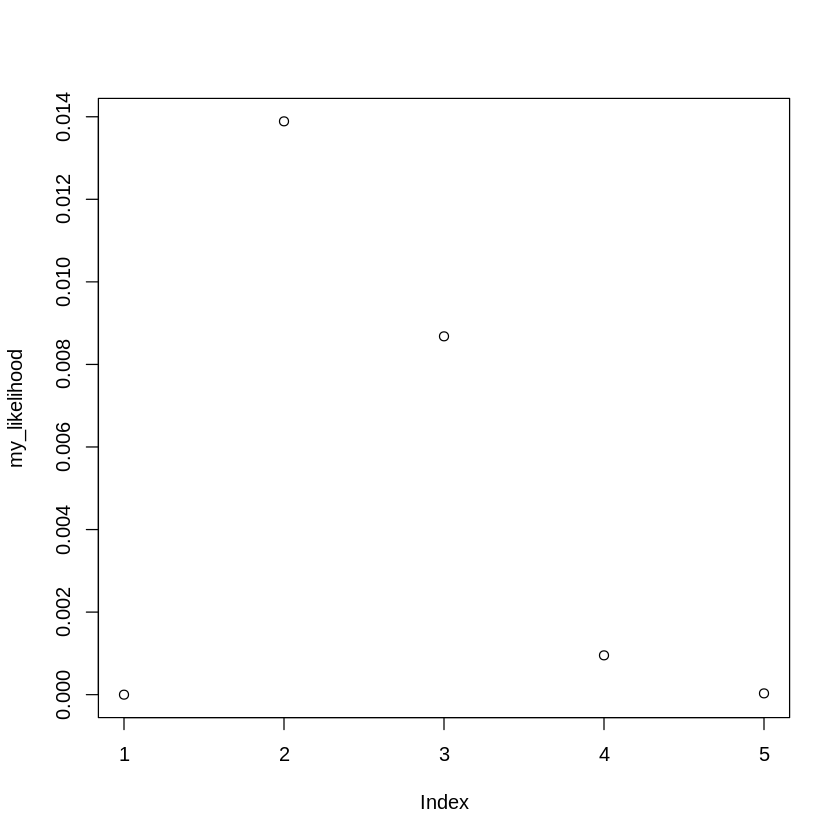

In [20]:
my_likelihood = rep(NA,5)

for (n in seq_along(my_likelihood)) {
    my_likelihood[n]=likelihood(n)
}

ml_estimate = which(my_likelihood == max(my_likelihood))
print(paste0("Maximum likelihood estimate: n = ",ml_estimate))
possible = which(my_likelihood >= 0.05*max(my_likelihood))
print(paste0("Possible n value after likelihood ratio test: n = ",possible))
plot(my_likelihood)

The ML estimator suggests that two dices were rolled. But it does not know our prior information that Person B likes the number three so much.

Here the Bayesian approach helps. In this approach, we simply multiply prior probabilities with the likelihood:

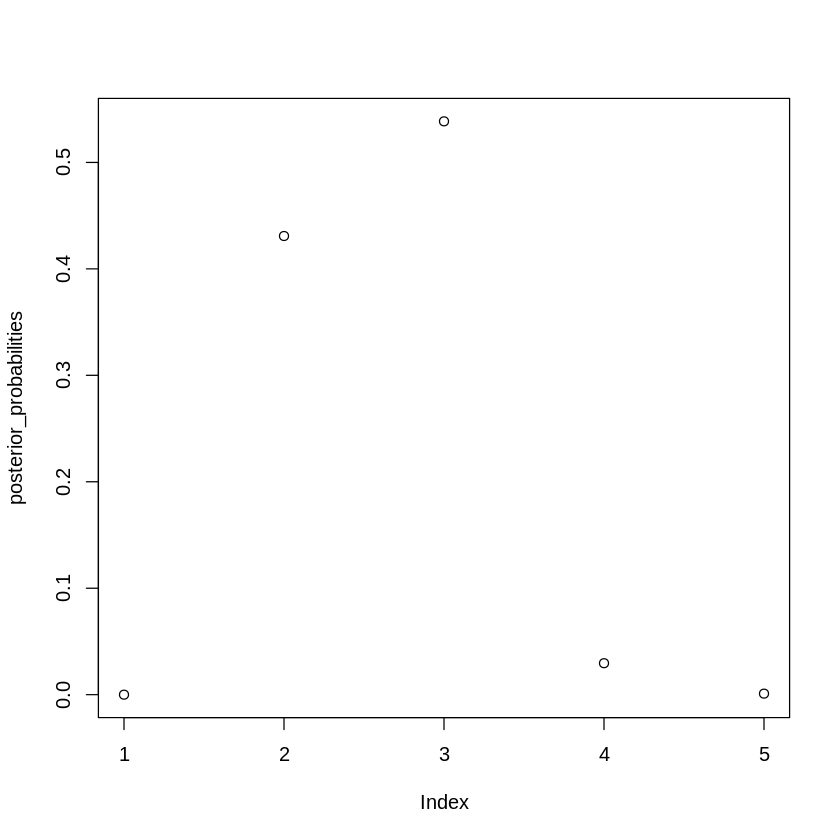

In [21]:
posterior_probabilities = prior_probabilities * my_likelihood
posterior_probabilities = posterior_probabilities/sum(posterior_probabilities) # normalise to a sum of 1
plot(posterior_probabilities)

The Bayesian model suggests that Person B rolled three dices. 

Even if the numbers 7 and 10 suggested that two dices were more likely, this piece of information was too weak to overrule our initial guess. 

__Note:__ When interpreting likelihoods as probabilities, you always make an initial guess. Even the assumption that all possible parameter values are apriori equally likely is prior information.